## Tarea 14 del curso CM-072

* Nombre y apellidos:
* Fecha de presentación: 11 de diciembre.

Una debilidad del  PCA es que no puede detectar características no lineales. Se ha desarrollado un conjunto de algoritmos conocidos como `Manifold Learning` para abordar esta deficiencia. Un conjunto de datos canónico utilizado `Manifold learning` es el `S-curve`.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

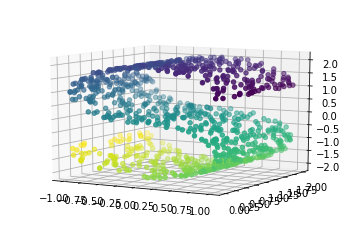

In [2]:

from sklearn.datasets import make_s_curve
X, y = make_s_curve(n_samples=1000)

from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.view_init(10, -60);

Este es un conjunto de datos bidimensional incorporado en tres dimensiones, pero está integrado de tal manera que PCA no puede descubrir la orientación de los datos subyacentes:

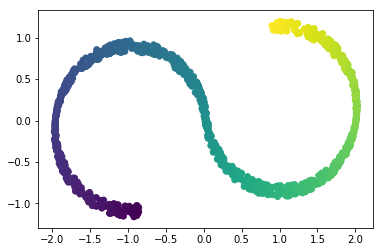

In [3]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y);

Los algoritmos de manifold, sin embargo, disponibles en el submódulo `sklearn.manifold`, son capaces de recuperar la variedad bidimensional subyacente:

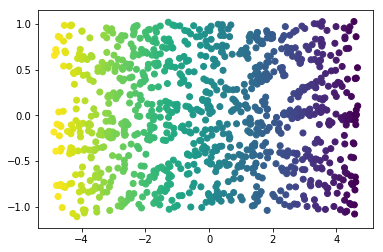

In [4]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=15, n_components=2)
X_iso = iso.fit_transform(X)
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y);

Podemos aplicar técnicas de manifold learning  a conjuntos de datos dimensionales altos, por ejemplo, los datos de digits que vimos antes:


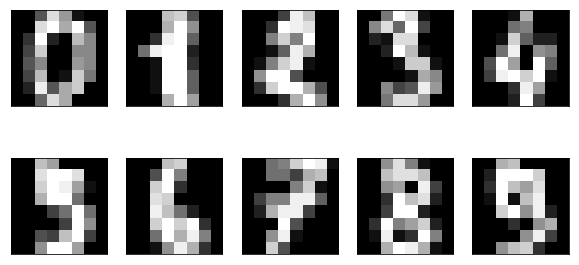

In [5]:
from sklearn.datasets import load_digits
digitos = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digitos.images):
    ax.imshow(img, interpolation="none", cmap="gray")

Podemos visualizar el conjunto de datos mediante una técnica lineal, como PCA. Vimos que esto ya proporciona cierta intuición sobre los datos:

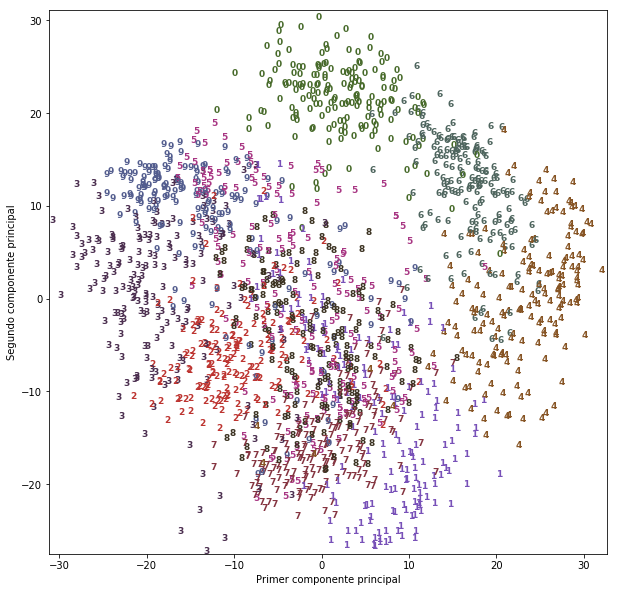

In [6]:
# Construimos un modelo PCA
pca = PCA(n_components=2)
pca.fit(digitos.data)

# transformamos los datos en los primeros dos componentes principales
digitos_pca = pca.transform(digitos.data)
colores = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digitos_pca[:, 0].min(), digitos_pca[:, 0].max() + 1)
plt.ylim(digitos_pca[:, 1].min(), digitos_pca[:, 1].max() + 1)
for i in range(len(digitos.data)):
    # 
    plt.text(digitos_pca[i, 0], digitos_pca[i, 1], str(digitos.target[i]),
             color = colores[digitos.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("Primer componente principal")
plt.ylabel("Segundo componente principal");

El uso de una técnica más potente y no lineal puede proporcionar visualizaciones mucho mejore. Usaremos el método t-SNE:

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# usamos fit_transform en lugar de fit, ya que TSNE no tiene el metodo trasnform:
digitos_tsne = tsne.fit_transform(digitos.data)

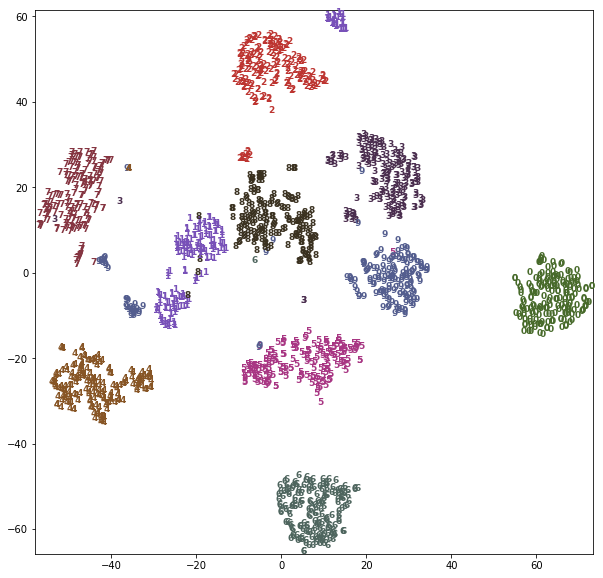

In [8]:
plt.figure(figsize=(10, 10))
plt.xlim(digitos_tsne[:, 0].min(), digitos_tsne[:, 0].max() + 1)
plt.ylim(digitos_tsne[:, 1].min(), digitos_tsne[:, 1].max() + 1)
for i in range(len(digitos.data)):
    # 
    plt.text(digitos_tsne[i, 0], digitos_tsne[i, 1], str(digitos.target[i]),
             color = colores[digitos.target[i]],
             fontdict={'weight': 'bold', 'size': 9})


`t-SNE` tiene un tiempo de ejecución algo más largo que otros algoritmos de manifold learning, pero el resultado es bastante sorprendente. Ten en cuenta que este algoritmo no tiene supervisión y no conoce las etiquetas de clase. Todavía es capaz de separar las clases muy bien (aunque las clases cuatro, una y nueve se han dividido en varios grupos).


### Ejercicios

1 .Compara los resultados de la aplicación de `isomap` al conjunto de datos `digits` con los resultados de `PCA` y `t-SNE`. ¿Qué resultado crees que se ve mejor?

In [9]:
# Tu solucion

2 .Dado que `t-SNE` separó las clases muy bien, uno podría estar tentado a usar este procesamiento para la clasificación. Intenta entrenar un clasificador del  `K` vecino más cercano en los datos `digits` transformados con `t-SNE` y compare con la precisión en el uso del conjunto de datos sin ninguna transformación.

In [10]:
# Tu solucion